<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## Hoja  de trabajo 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*movies.csv*". A continuación se muestran los resultados: 

In [2]:
import pandas as pd
from typing import *

dataframe: pd.DataFrame = pd.read_csv("movies.csv",  encoding='ISO-8859-1')
df = dataframe.drop('id', axis=1)
df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

df.describe()
f = df[df['castMenAmount']>1000]
f


,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
958,0,Action|Adventure,NaN,NaN,NaN,Germany,0.0,90,False,Winfried Oelsner,...,18.062,2005-08-28,4.6,6,2,1,15,4,10.0,3717.0
1109,0,Action,http://web.archive.org/web/20080210100832/http...,NaN,NaN,Japan,0.0,108,False,Shusuke Kaneko,...,13.989,2005-03-12,6.5,129,1,1,15,5,10.0,5890.0
1710,10000000,Family|Comedy,NaN,NaN,NaN,United States of America,10143022.0,89,False,Joe Nussbaum,...,13.183,2004-07-09,5.9,388,2,1,31,13,15.0,9893.0
1779,0,Action,NaN,NaN,NaN,United Kingdom|United States of America|Romania,0.0,94,False,Michael Keusch,...,7.649,2006-12-05,4.0,63,1,3,20,2,14.0,10049.0
1860,0,Action|Adventure|Comedy|Science Fiction,NaN,NaN,NaN,Hong Kong,0.0,106,False,Corey Yuen|Patrick Leung Pak-Kin,...,12.931,2004-08-12,4.8,62,4,1,12,4,8.0,10257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,0,Documentary,NaN,Zeppelin,NaN,NaN,0.0,89,NaN,Sebastián Alfie,...,99.425,2021-11-25,6.0,2,1,1,0,0,0.0,900887.0
9987,0,Romance|Comedy,NaN,NaN,NaN,Mexico,0.0,0,NaN,Jaime Segura,...,136.491,2021-09-01,8.0,54,2,1,8,2,3.0,901407.0
9989,0,Family|Drama,NaN,Mandarina Cine,NaN,NaN,0.0,0,False,Álvaro Curiel,...,134.269,2021-12-16,7.6,34,2,1,5,2,1.0,911071.0
9990,60,Comedy|Action|Adventure|Science Fiction,NaN,Jepchu Producciones,NaN,NaN,0.0,0,True,Miguel Angel Zavala,...,43.452,2014-01-03,10.0,1,4,1,12,0,8.0,912223.0


# Ejercicio 2

Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa
continua, cuantitativa discreta)

- Id: Cualitativa Ordinal
- popularity: Cuantitativa Discreta
- budget: Cuantitativa Discreta
- revenue: Cuantitativa Discreta
- original_title: Cualitativa Nominal
- originalLanguage: Cualitativa Nominal
- title: Cualitativa Nominal
- homePage: Cualitativa Nominal
- video: Cualitativa Nominal
- director: Cualitativa Nominal
- runtime: Cuantitativa Continua
- genres: Cualitativa Nominal
- genresAmount: Cuantitativa Discreta
- productionCompany: Cualitativa Nominal
- productionCoAmount: Cuantitativa Discreta
- productionCompanyCountry: Cualitativa Nominal
- productionCountry: Cualitativa Nominal
- productionCountriesAmount: Cuantitativa Contable
- releaseDate: Cualitativa Ordinal
- voteCount: Cuantitativa Contable
- voteAvg: Cuantitativo Contable
- actors: Cualitativo Nominal
- actorsPopularity: Cuantitativa Discreta
- actorsCharacter: Cualitativa Nominal
- actorsAmount: Cuantitativa Discreta
- castWomenAmount: Cuantitativa Discreta
- castMenAmount: Cuantitativa Discreta

# Ejercicio 4
## Responda las siguientes preguntas:

Las 10 peliculas con mayor presupuesto fueron:

In [66]:
dataframe.columns

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount', 'releaseYear', 'releaseMonth'],
      dtype='object')

4.3.¿Cuál es la película que más votos tuvo?

Al identificar el índice de la película con más votos se encontró que la misma es "Inception". A continuación se muestra una descripción general de la película: 

In [3]:
#Inciso 4.3.
indexMaxVotes = dataframe['voteCount'].idxmax()
movieMaxVotes = dataframe.loc[indexMaxVotes]
print(movieMaxVotes)

id                                                                       27205
budget                                                               160000000
genres                                        Action|Science Fiction|Adventure
homePage                                 http://inceptionmovie.warnerbros.com/
productionCompany             Legendary Pictures|Syncopy|Warner Bros. Pictures
productionCompanyCountry                                              US|GB|US
productionCountry                      United Kingdom|United States of America
revenue                                                            825532764.0
runtime                                                                    148
video                                                                    False
director                                                     Christopher Nolan
actors                       Leonardo DiCaprio|Joseph Gordon-Levitt|Ken Wat...
actorsPopularity             32.621|15.377|6.935|43.

4.4.¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

De la misma manera, al identificar el índice de la película con menos votos (peor película) se encontró que la misma es "La Mera Reyna del Sur". A continuación se muestra una descripción general de la película: 

In [4]:
#Inciso 4.4.
indexMinVotes = dataframe["voteCount"].idxmin()
worstMovie = dataframe.loc[indexMinVotes]
print(worstMovie)

id                                                                      113205
budget                                                                       0
genres                                                            Action|Crime
homePage                                                                   NaN
productionCompany                                    Javier Ulloa/Luis Estrada
productionCompanyCountry                                                   NaN
productionCountry                                                       Mexico
revenue                                                                    0.0
runtime                                                                     88
video                                                                    False
director                                                          Luis Estrada
actors                       Rafael Goyri|Ruben Gutierrez|Tania Mendoza|Toñ...
actorsPopularity             4.941|0.6|0.6|3.043|0.6

4.6.¿Cuál es el género principal de las 20 películas más recientes?

Para identificiar el género principal de las 20 películas más recientes se decidió filtrar primero la cantidad de géneros que tienen las películas para que solo quede uno predominante y de esta manera generar un recuento. Luego se filtraron los resultados para obtener un listado con las 20 películas más recientes y como resultado, se determinó que el principal género de la actualidad es "Comedy". A continuación se muestra el resultado:

In [20]:
#Inciso 4.6
firstgenre = dataframe
firstgenre["genres"] = dataframe["genres"].str.split("|").str[0]
# print(firstgenre[["title", "genres", "releaseDate"]])
releaseDateSortD = firstgenre.sort_values(by="releaseDate", ascending=False)
last20Movies = releaseDateSortD.head(20)
# print(last20Movies[["title", "genres", "releaseDate"]])
predominantGender = last20Movies["genres"].value_counts().idxmax()
print(predominantGender)

Comedy


¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico

De manera similar, se realizó un filtrado de los datos para obtener los géneros predominantes de cada película y se generó un histograma que muestra la distribución de los géneros respecto a la cantidad de películas por cada uno. Del mismo, se puede destacar que el género más producido es "Drama" por arriba de 1750 películas. Los siguientes géneros más vistos son "Comedy" y "Action" con un conteo aproximado de 1500 películas cada uno respectivamente. 

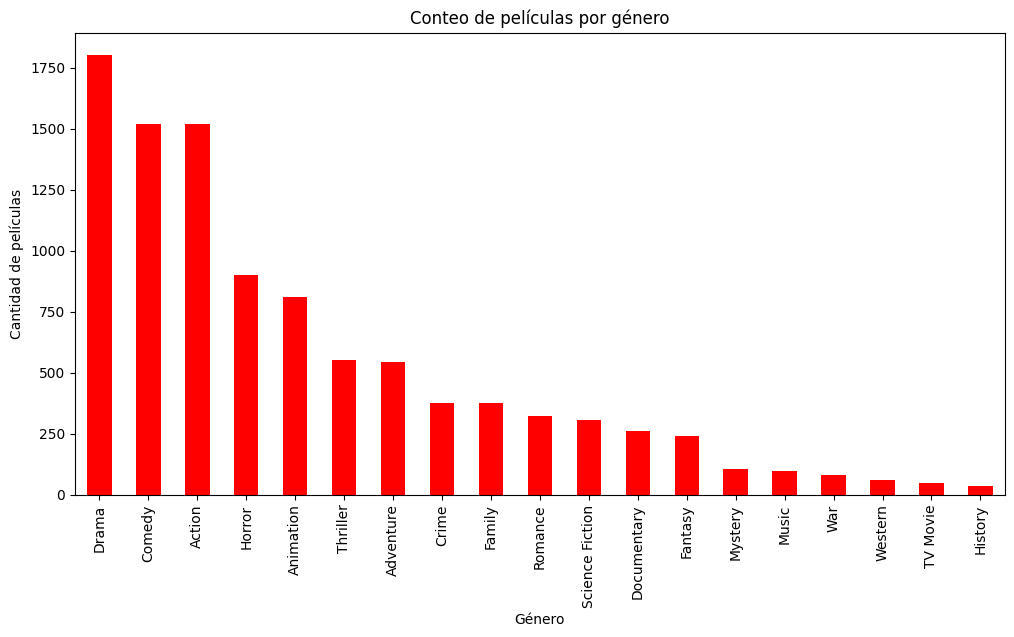

In [27]:
import matplotlib.pyplot as plt

#Filtro de datos
firstgenre = dataframe
firstgenre["genres"] = dataframe["genres"].str.split("|").str[0]
countGenders = dataframe["genres"].value_counts()

#Gráfico
plt.figure(figsize=(12,6))
countGenders.plot(kind="bar", color="red")
plt.title("Conteo de películas por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

4.8.¿La cantidad de actores influye en los ingresos de las películas?

Para determinar si la cantidad de actores influye en los ingresos de las películas, se procedió a generar un gráfico de dispersión y el cálculo del valor de correlación entre las columnas "actorsAmount" y "revenue" para ver qué tanto se relacionan una variable con la otra. Al observar el gráfico se puede determinar que son variables que no tienen relación absoluta y de acuerdo con el valor de correlación resultante de -0.0195548 se puede decir que se presenta una correlación cercana a 0, lo que implica que la relación lineal entre la cantidad de actores y los ingresos es débil o prácticamente inexistente. De la misma manera el R² cercano a 0 nos indica que existe una baja correlación entre la cantida de actores y los ingresos. 

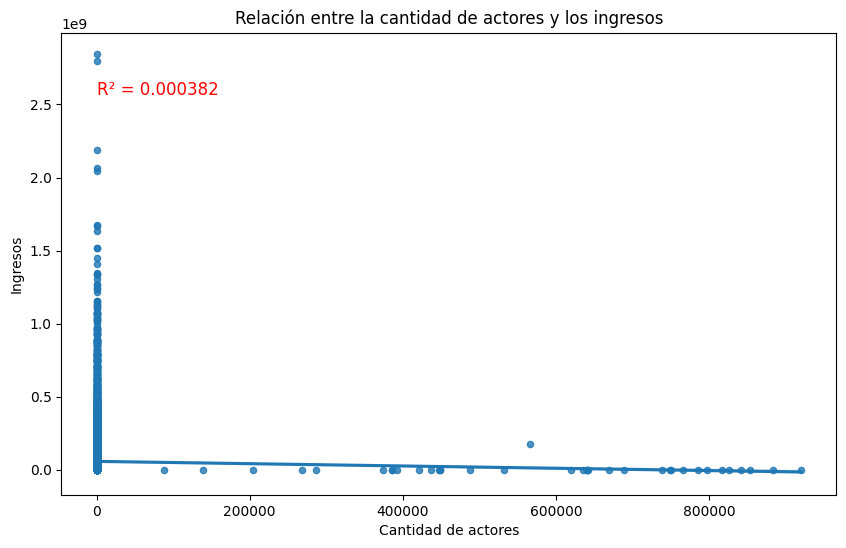

Coeficiente de determinación (R^2): 0.00038239333862918234
Valor de correlación:
-0.019554880174247613


In [38]:
#Inciso 4.8.
import matplotlib.pyplot as plt
import seaborn as sns

#Gráfico de dispersión
plt.figure(figsize=(10,6))
sns.regplot(x='actorsAmount', y='revenue', data=dataframe, scatter_kws={'s': 20})
plt.title("Relación entre la cantidad de actores y los ingresos")
plt.xlabel("Cantidad de actores")
plt.ylabel("Ingresos")
#Valor de correlación
correlation = dataframe['actorsAmount'].corr(dataframe['revenue'])
rSquared = correlation**2
plt.text(2, 0.9 * dataframe['revenue'].max(), f'R² = {rSquared:.6f}', fontsize=12, color='red')
plt.show()


print("Coeficiente de determinación (R^2):")
print(rSquared)
print("Valor de correlación:")
print(correlation)



¿Se han hecho películas con más actores en los últimos años?

También se decidió comprobar si en los últimos años, se han producido peliculas con mayor cantidad de actores. Para verificar esto, se realizó una gráfica de líneas que relaciona el "releaseYear" y el "actorsAmount" . De esto se puede observar que se presenta una variabilidad significativa a partir del año 2000 hasta la actualidad, alcanzando un pico máximo con más de 7500 actores y oscilando entre 0 a 5000 actores aproximadamente. Antes de los 2000, la cantidad de actores es significativamente menor.  

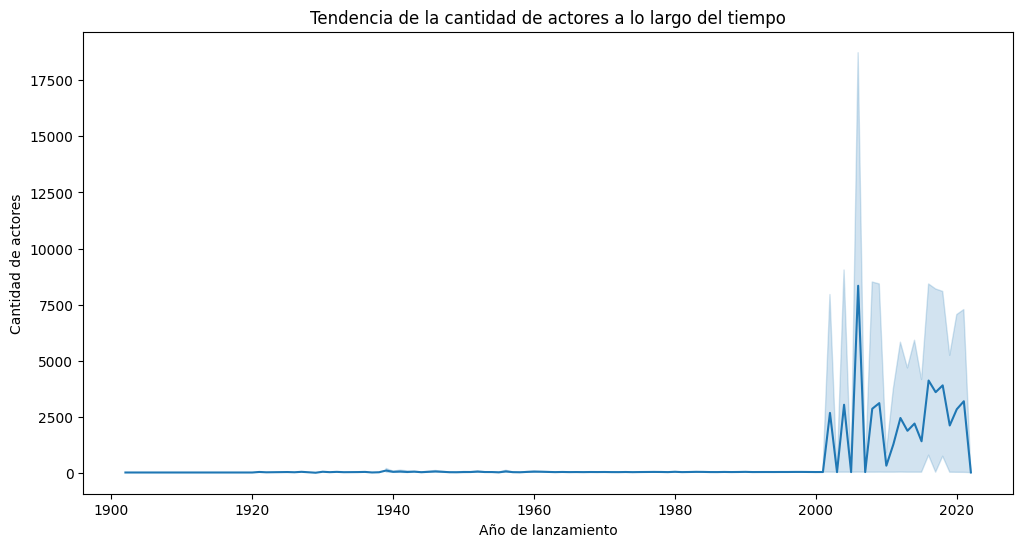

In [40]:
plt.figure(figsize=(12,6))
sns.lineplot(x="releaseYear", y="actorsAmount", data=dataframe)
plt.title("Tendencia de la cantidad de actores a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de actores")
plt.show()

4.10.¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

También se buscó identificar a los directores que hicieron las 20 películas mejor calificadas. Para ello, se utilizó la columna "voteAvg" para ordenar las 20 películas de forma descendente, se removieron los resultados que no tenian directores definidos (nan) y se logró identificar que hay 7 películas con una valoración promedio de 10. Se pueden mencionar a los directores como Laurent Bouzereau, Christin Baker y Rebecca Sugar como algunos que obtuvieron peliculas con valoración promedio de 10. 

In [47]:
# Inciso 4.10
from tabulate import tabulate
sortVoteAvg = dataframe.sort_values(by="voteAvg", ascending=False)
#print(sortVoteAvg[["director", "title", "voteAvg"]])
sortVoteAvg = sortVoteAvg.dropna(subset="director")
sortVoteAvg = sortVoteAvg.head(20)
table = tabulate(sortVoteAvg[["director", "title", "voteAvg"]], headers='keys', tablefmt='pretty', showindex=False)
print(table)


+---------------------------------------------------------------------------------------------+--------------------------------------------------------+---------+
|                                          director                                           |                         title                          | voteAvg |
+---------------------------------------------------------------------------------------------+--------------------------------------------------------+---------+
|                                      Laurent Bouzereau                                      |    Spirit of Vengeance: The Making of 'Ghost Rider'    |  10.0   |
|                                       Christin Baker                                        |                 Christmas at the Ranch                 |  10.0   |
|                                        Rebecca Sugar                                        |     Steven Universe: The Movie: Behind the Curtain     |  10.0   |
|                     

4.13.¿En qué meses se han visto los lanzamientos con mejores ingresos? 

Para determinar los meses en los que se han visto los lanzamientos con mejores ingresos se agrupó la cantidad de ingresos por cada mes y se calculó la media de ingresos. De los resultados se puede observar que el mes con mayor cantidad de ingresos promedio es junio. Es interesante notar que los meses cercanos a junio como mayo y julio le siguen entre los meses con mayor cantidad de ingresos. Finalmente se destaca que al finalizar el año, en noviembre y diciembre, se observa un incremento de ingresos respecto a lanzamientos de películas.  

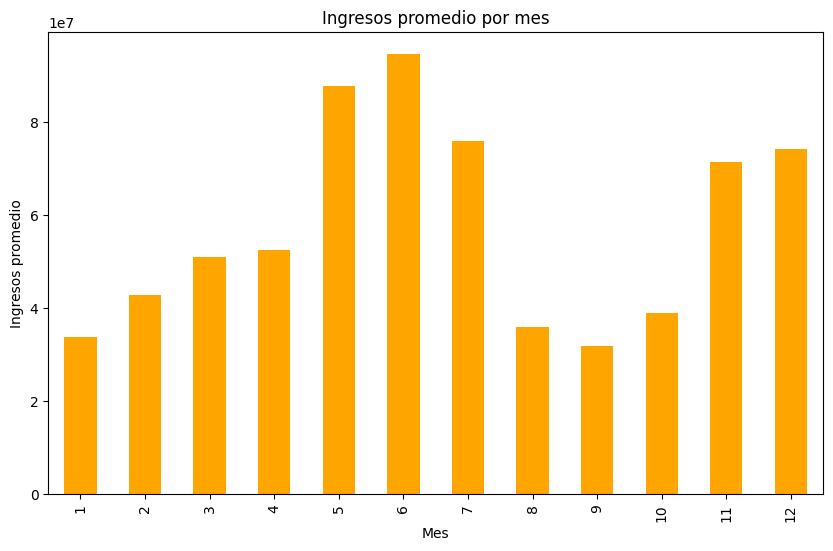

In [55]:
#Convertimos a formato fecha
dataframe["releaseDate"] = pd.to_datetime(dataframe["releaseDate"], errors="coerce")

#Extraemos el mes
dataframe["releaseMonth"] = dataframe["releaseDate"].dt.month

avgPerMonth = dataframe.groupby('releaseMonth')['revenue'].mean()

plt.figure(figsize=(10,6))
avgPerMonth.plot(kind="bar", color="orange")
plt.title("Ingresos promedio por mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos promedio")
plt.show()

¿Cuantas películas, en promedio, se han lanzado por mes?

Además, se procedió a realizar un conteo de la cantidad de películas lanzadas por mes a través de la agrupación de datos. Como resultado se obtuvo que la cantidad de peliculas que se han lanzado en promedio por mes, es de 833.33. A continuación se muestra el resultado: 

In [65]:
#Convertir a fecha
dataframe["releaseDate"] = pd.to_datetime(dataframe["releaseDate"], errors="coerce")
#Extraer mes
dataframe["releaseMonth"] = dataframe["releaseDate"].dt.month
#Calculo de promedio
countMoviesMonth = dataframe.groupby("releaseMonth").size()
avgMoviesPerMonth = countMoviesMonth.mean()
print("Promedio de películas lanzadas por mes:")
print(avgMoviesPerMonth)

Promedio de películas lanzadas por mes:
833.3333333333334
